In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
df=pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [8]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [9]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [10]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [11]:
## Independent feature and dependent feature
x=df.drop('FWI',axis=1)
y=df['FWI']

In [12]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [13]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [14]:
## Train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((170, 11), (73, 11), (170,), (73,))

In [15]:
## feature selection based on correlation 
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.640179,-0.295442,-0.303129,0.682819,0.495974,0.399434,0.608042,0.474804,0.528734,0.238873
RH,-0.640179,1.000000,0.201762,0.226259,-0.640759,-0.421517,-0.253547,-0.715106,-0.373155,-0.443073,-0.394121
Ws,-0.295442,0.201762,1.000000,0.244784,-0.169620,0.009523,0.092367,-0.004035,0.040699,-0.062718,-0.182236
Rain,-0.303129,0.226259,0.244784,1.000000,-0.536790,-0.288856,-0.304328,-0.341902,-0.300998,-0.367767,-0.051964
FFMC,0.682819,-0.640759,-0.169620,-0.536790,1.000000,0.625593,0.533040,0.748574,0.613526,0.781730,0.251710
DMC,0.495974,-0.421517,0.009523,-0.288856,0.625593,1.000000,0.870419,0.692435,0.983426,0.619536,0.210853
DC,0.399434,-0.253547,0.092367,-0.304328,0.533040,0.870419,1.000000,0.524898,0.943125,0.551208,-0.056844
ISI,0.608042,-0.715106,-0.004035,-0.341902,0.748574,0.692435,0.524898,1.000000,0.652179,0.737184,0.290294
BUI,0.474804,-0.373155,0.040699,-0.300998,0.613526,0.983426,0.943125,0.652179,1.000000,0.616406,0.115434
Classes,0.528734,-0.443073,-0.062718,-0.367767,0.781730,0.619536,0.551208,0.737184,0.616406,1.000000,0.177257


# Check for multicolinerity (Independent feature highly correlated)


<Axes: >

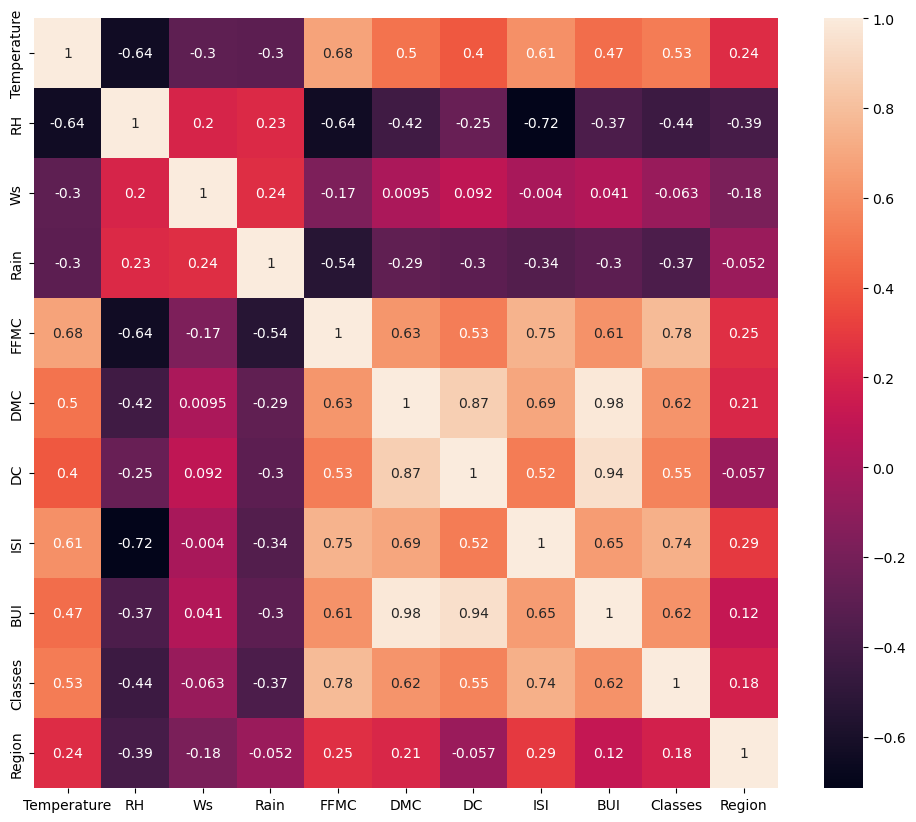

In [16]:
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [17]:
def coorelation(dataset,threshold):
    col_corr=set() # set to store correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
corr_features=coorelation(x_train,0.85)

In [19]:
corr_features

{'BUI', 'DC'}

In [20]:
## drop features when correlation is more than 0.85 
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((170, 9), (73, 9))

## Feature  Scaling Or Standardization 

In [21]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(x_train)
X_test_scaled=scaler.transform(x_test)

In [22]:
X_train_scaled

array([[ 0.26131696, -0.86261203, -0.59170487, ...,  0.57277215,
         0.90992142, -1.        ],
       [-1.64645715,  1.16565969,  0.17323679, ..., -1.03570698,
        -1.098996  , -1.        ],
       [-0.0112222 , -0.5921758 , -1.73911734, ..., -0.82590535,
        -1.098996  , -1.        ],
       ...,
       [-1.91899631,  0.89522346,  0.55570761, ..., -1.05901827,
        -1.098996  , -1.        ],
       [ 0.53385612, -0.25413052,  0.17323679, ...,  0.61939473,
         0.90992142,  1.        ],
       [-0.55630052,  0.96283252,  2.08559091, ..., -0.84921665,
        -1.098996  , -1.        ]])

## Box Plot to understand the affect of Standard scaler

/var/folders/gf/8gzlmsf533vb3qm_f7g9428c0000gn/T/ipykernel_36549/81964203.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train After Scaling')

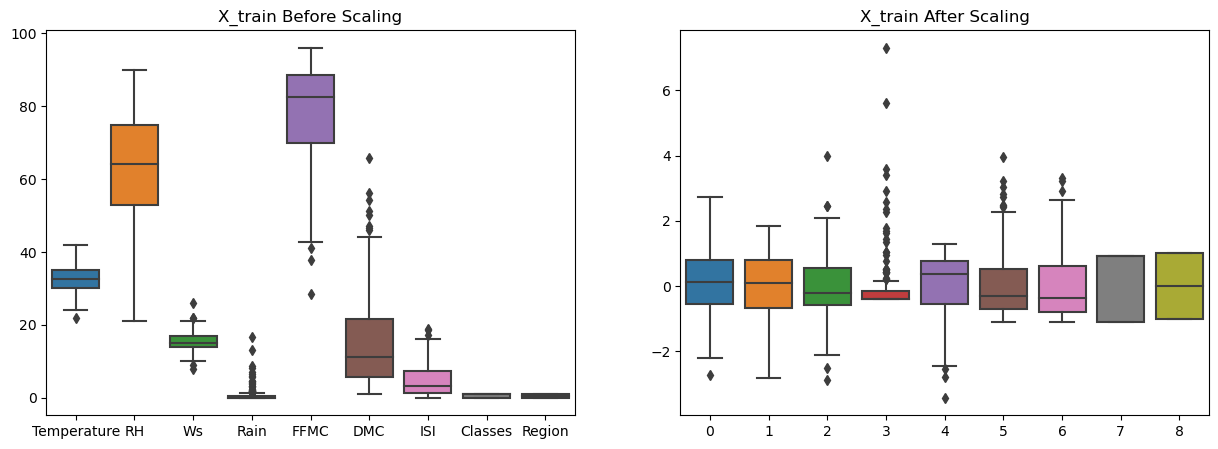

In [23]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("X_train Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train After Scaling")

## Linear Regression Model 

mean_absolute_error 0.5648036371485099
r2_score 0.9847206874554417


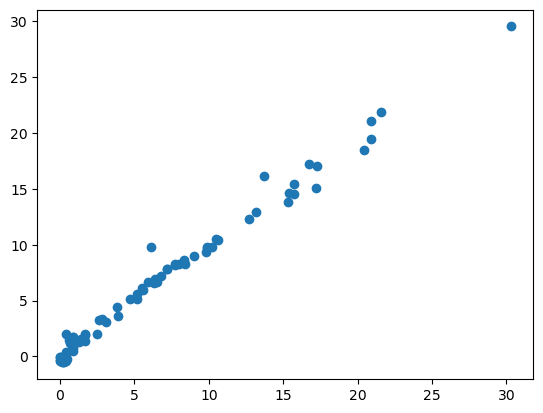

In [24]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score 
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("r2_score",score)
plt.scatter(y_test,y_pred)


## Lasso Regression 

mean_absolute_error 1.120336888239321
r2_score 0.9511364350928344


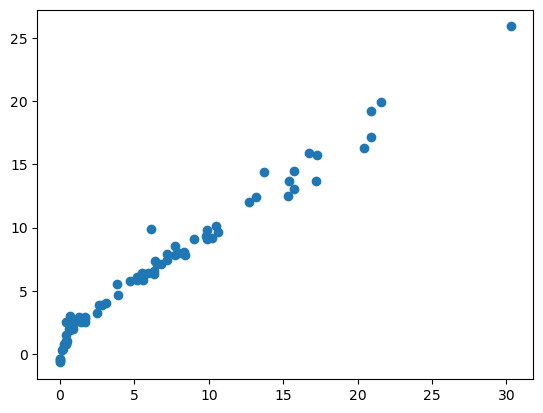

In [25]:
from sklearn.linear_model import Lasso 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("r2_score",score)
plt.scatter(y_test,y_pred)

## Cross Validation Lasso

In [26]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

mean_absolute_error 0.6356015744517415
r2_score 0.9821627684487946


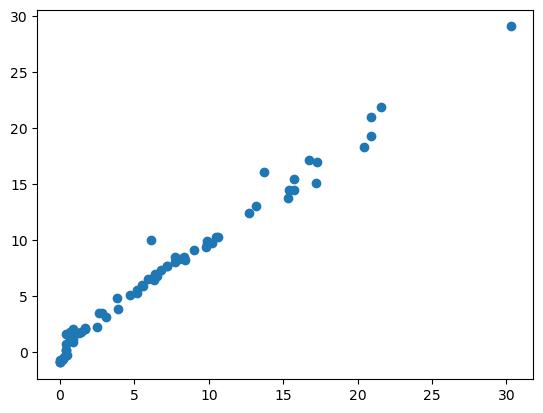

In [27]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("r2_score",score)     


## Ridge Regression 

mean_absolute_error 0.5844876727578043
r2_score 0.9841610358272455


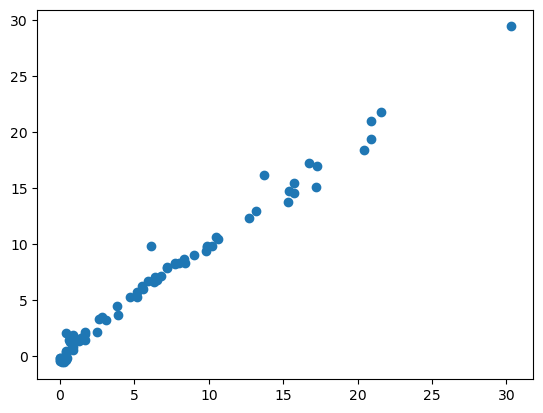

In [28]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("r2_score",score)
plt.scatter(y_test,y_pred)

## Cross Validation Ridge

mean_absolute_error 0.7943132619521917
r2_score 0.976223192919533


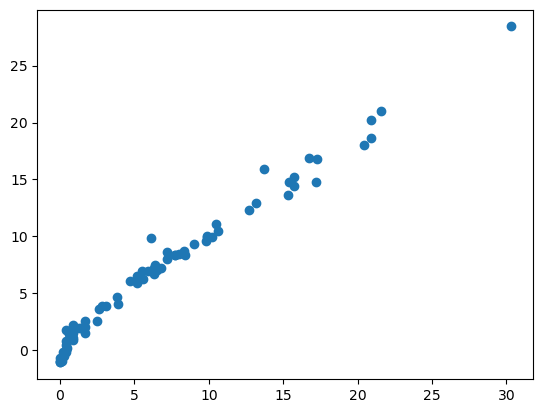

In [29]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("r2_score",score)

In [30]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

## Elastic Net 

mean_absolute_error 1.8554687479717555
r2_score 0.8804077479376988


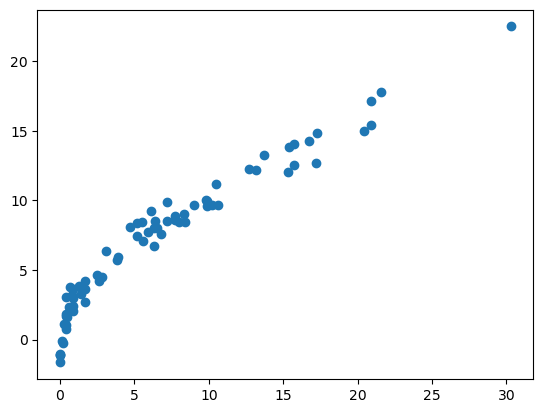

In [31]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticnet=ElasticNet()
elasticnet.fit(X_train_scaled,y_train)
y_pred=elasticnet.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("r2_score",score)
plt.scatter(y_test,y_pred)

## Pickle the machine learning model,preprocessing model standarscaler

In [32]:
scaler

StandardScaler()

In [33]:
ridge

Ridge()

In [34]:
import pickle 
pickle.dump(scaler,open('scaler.pkl','wb'))


pickle.dump(ridge,open('ridge.pkl','wb'))


In [37]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
29,33,50,14,0.0,88.7,22.9,7.2,1,0
120,26,80,16,1.8,47.4,2.9,0.3,0,0
114,32,54,11,0.5,73.7,7.9,1.2,0,0
241,24,54,18,0.1,79.7,4.3,1.7,0,1
5,31,67,14,0.0,82.6,5.8,3.1,1,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,34,59,16,0.0,88.1,19.5,7.4,1,1
